In [2]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from matplotlib import animation
import time
from IPython.display import clear_output
"""Constantes"""

WINFEK = 0.7
STRAHL = 2
ALPHA = 0.8
DAYS = 5

In [3]:
def getIndexCoordinate(array, coordinate):
    try:
        index = np.where(np.all(array == coordinate, axis=1))
    except:
        print(f"arr: {array}, coord: {coordinate}")
    #print(np.all(array==coordinate, axis=1))
    #print(f"Iiih index: {index}")
    return index[0]

In [4]:
def updateRowMenschem(coordinate, value):
    global menschenNP
    global infiziertMenschen
    global imune
    #print(f"value: {value}")
    #index = getIndexCoordinate(menschenNP, coordinate)
    index = int(value[0])
    #print()
    #print(f"Coordenadas: {coordinate}")
    #print(f"index: {index}")
    
    if int(value[-1]) == 0:
        #print(infiziertMenschen, value)
        
        #print(f"Deletei: {coordinate} | idx: {idx}")
        #print(infiziertMenschen)
        
        if [value[0], -1] not in imune.tolist():
            idx = getIndexCoordinate(infiziertMenschen, coordinate)
            infiziertMenschen = np.delete(infiziertMenschen, idx[0], axis=0)
            imune = np.append(imune, [[value[0], -5]], axis=0)
            menschenNP[index] = [value[0], value[1], value[2], -5]
        else:
            idxImune = getIndexCoordinate(imune, [value[0], 0])
            try:
                menschenNP[index][-1] = 0
            except:
                print(1)
            try:
                imune = np.delete(imune, idxImune, axis=0)
            except:
                print(2, idxImune)
                a = input("Continuar 2?: ")
    elif int(value[-1]) == DAYS:
        menschenNP[index] = value
        infiziertMenschen = np.append(infiziertMenschen, [value], axis=0 )
    elif int(value[-1]) < 0:
        idxImune =  getIndexCoordinate(imune, [value[0], value[-1]-1])
        imune[idxImune] = [value[0], value[-1]]
        menschenNP[index][-1] = value[-1]

    else:
        menschenNP[index] = value
        idx = getIndexCoordinate(infiziertMenschen, coordinate)
        infiziertMenschen[idx] = np.array([value])
        

    #print(f"A pessoa {coordinate} foi infectada")

In [5]:
def checkInsideRadius(array, center, radius):
    #print(infiziertMenschen)
    #print(center)
    Cx, Cy = center[1], center[2]
    condition = radius**2 - Cx**2 - Cy**2
    
    for elem in array:
        if elem not in infiziertMenschen and elem not in imune:
            expression = elem[1]**2 + elem[2]**2 - 2*elem[1]*Cx - 2*elem[2]*Cy 
            if expression <= condition and elem[3] == 0:
                #print(f"Este elemento está dentro do raio: {elem}")
                distance = (expression + Cx**2 + Cy**2)**(0.5)
                infizieren(array, elem, distance)
        else:
            pass
            #a = input(f"elem: {elem}, arr: {array}, expr: {elem not in infiziertMenschen}")

In [6]:
def infizieren(array, person, distance): 
    randomReal = rd.uniform(0.2, 1)
    prob = (ALPHA*randomReal)/(distance**2)
    #print(f"Probabilidade: {prob}") 
    if prob >= 0.6:
        updateRowMenschem(person, [person[0], person[1], person[2], DAYS])
        #print(f"{person} com uma distância de {distance} foi infectado")   

In [7]:
def scheckInfiziert(array, infiziert):
    for elem in infiziert:
        checkInsideRadius(array, elem, STRAHL)

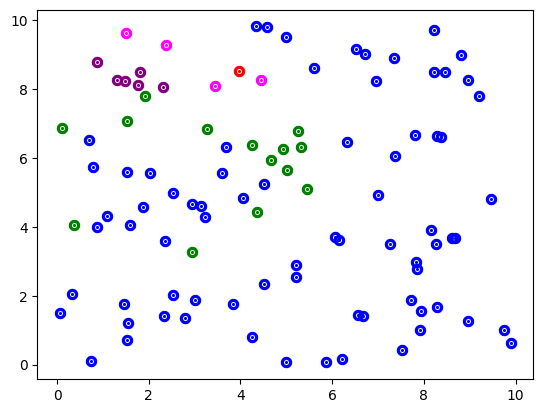

KeyboardInterrupt: 

In [8]:
menschenNP = np.empty(shape=[0, 4])
#print(menschenNP)
menschenList = []

k = 0
rng = np.random.default_rng(12345)


numeros = []
for i in range(0, 10):
    for j in range(0, 10):
        while True:
            #rngRandom1 = rng.random()
            #rngRandom2 = rng.random()
            #print(rngRandom1, rngRandom2)
            ri = round(np.random.uniform(0, 10), 4)
            rj = round(np.random.uniform(0, 10), 4)

            if (ri, rj) not in numeros:
                menschenNP = np.append(menschenNP, [[int(k), ri, rj, 0]], axis=0)
                numeros.append((ri, rj))
                k += 1
                break
#print(numeros)
#a = input("Continuar")
menschenNP[42][-1] = DAYS
menschenNP[13][-1] = DAYS
menschenNP[36][-1] = DAYS
infiziertMenschen = np.array([menschenNP[42],menschenNP[13], menschenNP[36]])
imune = np.empty(shape=[0,2])
#fig = plt.figure()
#ax = fig.add_subplot(111, xlim=(0, 10), ylim=(0,10))

for k in range(100):
    print(k)
    clear_output(wait=True)
    scheckInfiziert(menschenNP, infiziertMenschen)
    #print(f"InfiziertMenschen: {infiziertMenschen} | Tamanho: {len(infiziertMenschen)}")
    col = []
    #print(menschenNP)
    for i in range(0, len(menschenNP)):
    
        if menschenNP[i][3] == 0:
            col.append('blue')
        elif 3 <= menschenNP[i][3] <= 4:
            col.append('magenta')
        elif 1 <= menschenNP[i][3] <= 2:
            col.append('purple')
        elif menschenNP[i][3] < 0:
            col.append('green')
        else:
            col.append('red')


    for k in range(len(menschenNP)):
        plt.scatter(menschenNP[k][1], menschenNP[k][2], c = col[k], s = 5, linewidth=6)
    
    plt.show()
    
    time.sleep(1)
    plt.clf()
    plt.close()
    
    for z in infiziertMenschen:
        try:
            updateRowMenschem(z, [z[0], z[1], z[2], z[3]-1])
        except:
            print(f"Deu ruim: {z}")
    for z in imune:
        #input(f"z: {z}")
        try:
            updateRowMenschem(z, [z[0], z[1]+1])
        except:
            a = input("Continuar?")
            print(f"Deu ruim: {z}") 


In [ ]:
a = np.array([[10, 3]])

if [10, 2] in a.tolist():
    print(True)
else:
    print(False)
